In [697]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#chi-square test
import scipy.stats as stats

# SMOTE for Imbalance Handling
from imblearn.over_sampling import SMOTE

# Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [698]:
pd.set_option('display.max_columns',None)
df = pd.read_csv("hotel_bookings.csv")
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [699]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [700]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [702]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [703]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [704]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [705]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [706]:
df.dropna(subset=["children","country","agent"],inplace=True)
df.reset_index(drop=True,inplace=True)
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [707]:
# Dropping unnecessary columns
df.drop(['company'],axis=1, inplace=True)

In [708]:
# Converting to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Creating a new feature: days_since_booking
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# Days between booking and status update
df['days_since_booking'] = (df['reservation_status_date']-df['arrival_date']).dt.days

# Drop 'reservation_status_date' and 'arrival_date' after extracting features
df.drop(['reservation_status_date', 'arrival_date'], axis=1, inplace=True)


In [709]:
# Drop original columns after creating datetime
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [710]:
df

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,days_since_booking
0,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,1
1,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2
2,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2
3,Resort Hotel,0,9,27,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2
4,Resort Hotel,1,85,27,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,City Hotel,0,23,35,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,7
102890,City Hotel,0,102,35,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,7
102891,City Hotel,0,34,35,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,7
102892,City Hotel,0,109,35,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,7


In [711]:
#correlation between numerical features
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,days_since_booking
is_canceled,1.000000,0.277666,0.004172,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.029913,0.117983,-0.042589,-0.131714,-0.081939,0.052475,0.023284,-0.188298,-0.257934,-0.614703
lead_time,0.277666,1.000000,0.120155,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.055432,0.100271,-0.045082,-0.000282,-0.068753,0.170352,-0.112652,-0.111226,-0.123047,-0.556866
arrival_date_week_number,0.004172,0.120155,1.000000,0.010114,0.013212,0.003496,-0.000687,0.007865,-0.013250,0.042645,-0.025095,0.008551,-0.030993,0.023822,0.062570,-0.001477,0.021639,-0.044254
stays_in_weekend_nights,-0.023589,0.047674,0.010114,1.000000,0.486350,0.070997,0.039961,0.020068,-0.056987,-0.003021,-0.028041,0.054693,0.141387,-0.064610,0.016233,-0.011037,0.056110,0.073351
stays_in_week_nights,0.003918,0.124195,0.013212,0.486350,1.000000,0.071890,0.039922,0.021008,-0.057415,-0.013591,-0.029082,0.081598,0.183281,-0.009330,0.036263,-0.016376,0.050318,0.004902
adults,0.037057,0.072477,0.003496,0.070997,0.071890,1.000000,0.014385,0.013307,-0.073802,-0.003366,-0.054299,-0.051995,-0.034489,-0.022945,0.237099,0.036907,0.116793,-0.042588
children,0.005409,-0.049796,-0.000687,0.039961,0.039922,0.014385,1.000000,0.016742,-0.018975,-0.025070,-0.009899,0.055324,0.041242,-0.036455,0.335729,0.065531,0.068130,0.019709
babies,-0.032038,-0.021975,0.007865,0.020068,0.021008,0.013307,0.016742,1.000000,-0.006906,-0.007150,-0.002595,0.094213,0.036338,-0.010894,0.025584,0.039087,0.091729,0.025590
is_repeated_guest,-0.029913,-0.055432,-0.013250,-0.056987,-0.057415,-0.073802,-0.018975,-0.006906,1.000000,0.073284,0.396805,-0.000578,0.031624,-0.015835,-0.092619,0.028749,0.004312,-0.017709
previous_cancellations,0.117983,0.100271,0.042645,-0.003021,-0.013591,-0.003366,-0.025070,-0.007150,0.073284,1.000000,0.093910,-0.029375,-0.012382,0.005441,-0.072563,-0.022090,-0.061169,-0.127015


Text(0.5, 1.0, 'Heatmap')

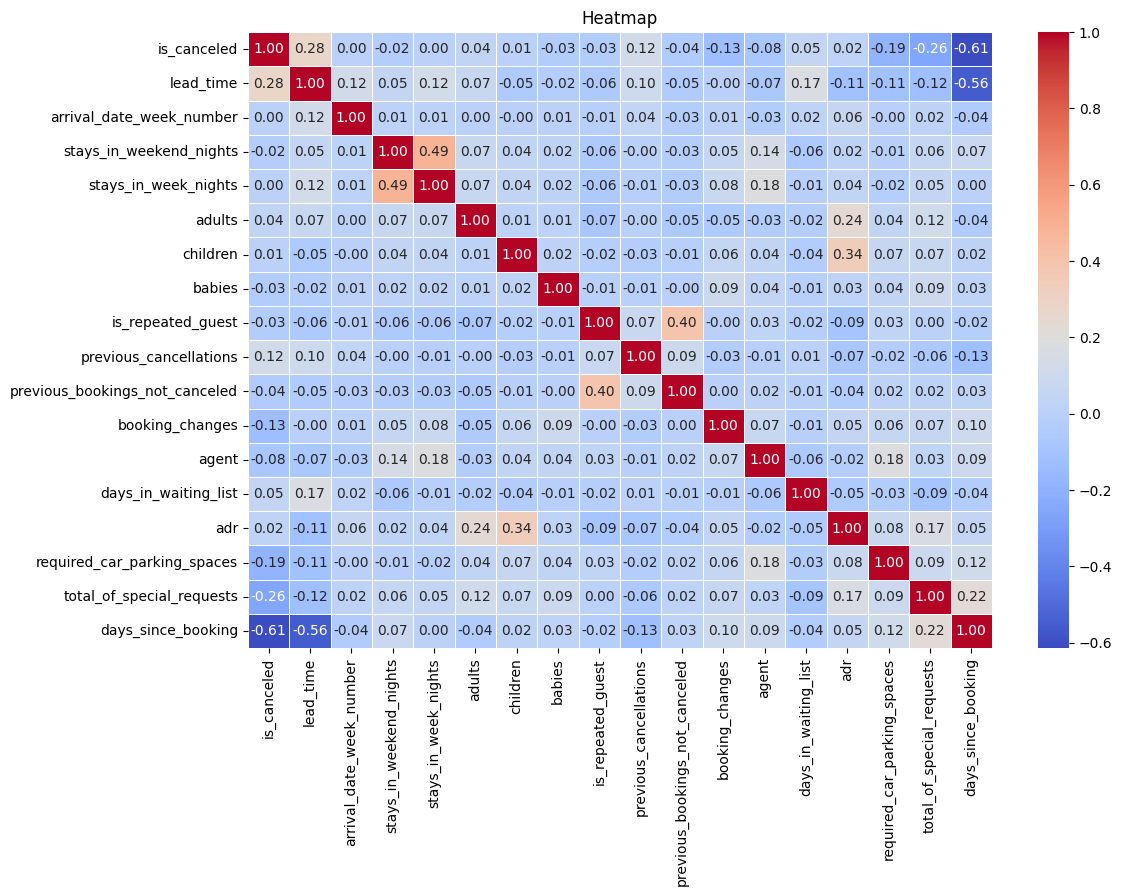

In [712]:
#representation of correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5) 
plt.title("Heatmap")

In [713]:
#drop columns with low correlation
df.drop(["days_since_booking","required_car_parking_spaces","booking_changes","agent",
         "previous_bookings_not_canceled","is_repeated_guest","stays_in_weekend_nights",
         "arrival_date_week_number","stays_in_week_nights","babies","children"],axis=1,inplace=True)

In [714]:
#chi-square test between non-numerical features

categorical_var=['hotel', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'deposit_type',
                    'customer_type', 'country','reservation_status']
alpha=0.05
for i in categorical_var:
   print("Chi-Square Test for",i,"vs is_canceled")

# contingency table 
   contingency_table = pd.crosstab(df[i], df['is_canceled'])

# Chi-Square test
   chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


   print("Chi-Square Statistic:",chi2)
   print("P-value:",p)
   print("degrees of freedom",dof)


   if p < alpha:
        print(" There is a significant relationship between",i,"and is_canceled.\n")
   else:
        print(" No significant relationship between",i,"and is_canceled.\n")

Chi-Square Test for hotel vs is_canceled
Chi-Square Statistic: 1389.678137103218
P-value: 3.676187990585806e-304
degrees of freedom 1
 There is a significant relationship between hotel and is_canceled.

Chi-Square Test for meal vs is_canceled
Chi-Square Statistic: 292.788684226118
P-value: 3.8924751748250245e-62
degrees of freedom 4
 There is a significant relationship between meal and is_canceled.

Chi-Square Test for market_segment vs is_canceled
Chi-Square Statistic: 5883.389523856048
P-value: 0.0
degrees of freedom 6
 There is a significant relationship between market_segment and is_canceled.

Chi-Square Test for distribution_channel vs is_canceled
Chi-Square Statistic: 1258.8343851763814
P-value: 1.2585062919412155e-272
degrees of freedom 3
 There is a significant relationship between distribution_channel and is_canceled.

Chi-Square Test for reserved_room_type vs is_canceled
Chi-Square Statistic: 594.9843088248017
P-value: 2.9279534767174504e-124
degrees of freedom 7
 There is a 

In [715]:

df.drop(["reservation_status"],axis=1,inplace=True)

In [716]:
df

,hotel,is_canceled,lead_time,adults,meal,country,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,Resort Hotel,0,13,1,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,0,Transient,75.00,0
1,Resort Hotel,0,14,2,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,0,Transient,98.00,1
2,Resort Hotel,0,14,2,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,0,Transient,98.00,1
3,Resort Hotel,0,9,2,FB,PRT,Direct,Direct,0,C,C,No Deposit,0,Transient,103.00,1
4,Resort Hotel,1,85,2,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,0,Transient,82.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,City Hotel,0,23,2,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,0,Transient,96.14,0
102890,City Hotel,0,102,3,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,0,Transient,225.43,2
102891,City Hotel,0,34,2,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,0,Transient,157.71,4
102892,City Hotel,0,109,2,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,0,Transient,104.40,0


In [717]:
df.dtypes

hotel                         object
is_canceled                    int64
lead_time                      int64
adults                         int64
meal                          object
country                       object
market_segment                object
distribution_channel          object
previous_cancellations         int64
reserved_room_type            object
assigned_room_type            object
deposit_type                  object
days_in_waiting_list           int64
customer_type                 object
adr                          float64
total_of_special_requests      int64
dtype: object

In [718]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [719]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [720]:
df['market_segment'].unique()

array(['Corporate', 'Online TA', 'Direct', 'Offline TA/TO', 'Groups',
       'Complementary', 'Aviation'], dtype=object)

In [721]:
df["distribution_channel"].unique()

array(['Corporate', 'TA/TO', 'Direct', 'GDS'], dtype=object)

In [722]:
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [723]:
df["assigned_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'K'], dtype=object)

In [724]:
df["country"].unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN',
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM',
       'JPN', 'LKA', 'CUB', 'CMR', 'MUS', 'COM', 'SUR', 'UGA', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'ISL', 'ECU', 'NPL', 'CPV', 'BHS',
       'MAC', 'TGO', 'TWN', 'DJI', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA',
       'KHM', 'MCO', 

In [725]:
#dropping country since more no.of unique values
df.drop(["country"],axis=1,inplace=True)

In [726]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [727]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [728]:
# mapping categorical columns 

hotel_map = {'Resort Hotel': 0, 'City Hotel': 1}
meal_map = {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
market_segment_map = {
    'Corporate': 0, 'Online TA': 1, 'Direct': 2, 'Offline TA/TO': 3,
    'Groups': 4, 'Complementary': 5, 'Aviation': 6}
distribution_channel_map = {
    'Corporate': 0, 'TA/TO': 1, 'Direct': 2, 'GDS': 3}
reserved_room_type_map = {k: i for i, k in enumerate(['A', 'B','C', 'D', 'E', 'F','G','H'])}
assigned_room_type_map = {k: i for i, k in enumerate(['A', 'B','C', 'D', 'E', 'F','G' , 'I','H', 'K'])}
deposit_type_map = {'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}
customer_type_map = {'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}


In [729]:
def apply_mappings(df):
    df['hotel'] = df['hotel'].map(hotel_map).astype(int)
    df['meal'] = df['meal'].map(meal_map).astype(int)
    df['market_segment'] = df['market_segment'].map(market_segment_map).astype(int)
    df['distribution_channel'] = df['distribution_channel'].map(distribution_channel_map).astype(int)
    df['reserved_room_type'] = df['reserved_room_type'].map(reserved_room_type_map).astype(int)
    df['assigned_room_type'] = df['assigned_room_type'].map(assigned_room_type_map).astype(int)
    df['deposit_type'] = df['deposit_type'].map(deposit_type_map).astype(int)
    df['customer_type'] = df['customer_type'].map(customer_type_map).astype(int)
    return df


In [730]:
df = apply_mappings(df)


In [731]:
df

,hotel,is_canceled,lead_time,adults,meal,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,0,0,13,1,0,0,0,0,0,0,0,0,0,75.00,0
1,0,0,14,2,0,1,1,0,0,0,0,0,0,98.00,1
2,0,0,14,2,0,1,1,0,0,0,0,0,0,98.00,1
3,0,0,9,2,1,2,2,0,2,2,0,0,0,103.00,1
4,0,1,85,2,0,1,1,0,0,0,0,0,0,82.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,1,0,23,2,0,3,1,0,0,0,0,0,0,96.14,0
102890,1,0,102,3,0,1,1,0,4,4,0,0,0,225.43,2
102891,1,0,34,2,0,1,1,0,3,3,0,0,0,157.71,4
102892,1,0,109,2,0,1,1,0,0,0,0,0,0,104.40,0


In [732]:
df.dtypes

hotel                          int64
is_canceled                    int64
lead_time                      int64
adults                         int64
meal                           int64
market_segment                 int64
distribution_channel           int64
previous_cancellations         int64
reserved_room_type             int64
assigned_room_type             int64
deposit_type                   int64
days_in_waiting_list           int64
customer_type                  int64
adr                          float64
total_of_special_requests      int64
dtype: object

In [733]:
import warnings
warnings.filterwarnings('ignore')

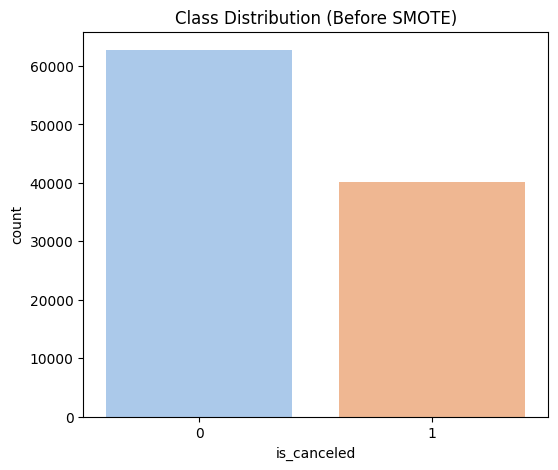

In [734]:
# Plot class distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='is_canceled', data=df, palette='pastel')
plt.title("Class Distribution (Before SMOTE)")
plt.show()

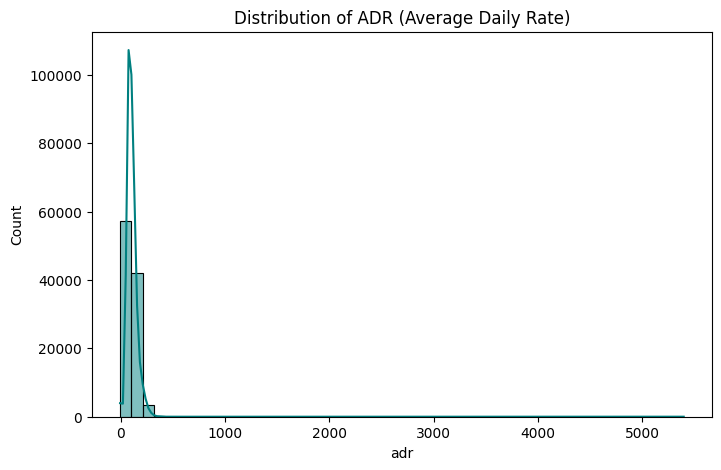

In [735]:
# ADR Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['adr'], bins=50, kde=True, color='teal')
plt.title("Distribution of ADR (Average Daily Rate)")
plt.show()

In [736]:
#input and output seperation
x = df.drop(columns=['is_canceled'], axis=1)  
y = df['is_canceled']

In [737]:
y.value_counts()

is_canceled
0    62733
1    40161
Name: count, dtype: int64

In [738]:
#ImBalance Handling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
df

,hotel,is_canceled,lead_time,adults,meal,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests
0,0,0,13,1,0,0,0,0,0,0,0,0,0,75.00,0
1,0,0,14,2,0,1,1,0,0,0,0,0,0,98.00,1
2,0,0,14,2,0,1,1,0,0,0,0,0,0,98.00,1
3,0,0,9,2,1,2,2,0,2,2,0,0,0,103.00,1
4,0,1,85,2,0,1,1,0,0,0,0,0,0,82.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,1,0,23,2,0,3,1,0,0,0,0,0,0,96.14,0
102890,1,0,102,3,0,1,1,0,4,4,0,0,0,225.43,2
102891,1,0,34,2,0,1,1,0,3,3,0,0,0,157.71,4
102892,1,0,109,2,0,1,1,0,0,0,0,0,0,104.40,0


In [739]:
y_resampled.value_counts()

is_canceled
0    62733
1    62733
Name: count, dtype: int64

In [740]:
# x,y  train test Split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=42)


In [741]:
#model creation
knn=KNeighborsClassifier()
naive=BernoulliNB()
decis=DecisionTreeClassifier(criterion="entropy")
random=RandomForestClassifier()
lst=[knn,naive,decis,random]

In [742]:
for i in lst:
    print("Model name:",i)
    
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('-'*100)

    cm=confusion_matrix(y_test,y_pred)
    print("Confusion metrix:",cm)
    print("-"*100)

    score=accuracy_score(y_test,y_pred)
    print("accuracy score:",score)
    print("-"*100)

    cr=classification_report(y_test,y_pred)
    print("Classification report:",cr)
    print("-"*100)

Model name: KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
Confusion metrix: [[13813  5092]
 [ 3377 15358]]
----------------------------------------------------------------------------------------------------
accuracy score: 0.775
----------------------------------------------------------------------------------------------------
Classification report:               precision    recall  f1-score   support

           0       0.80      0.73      0.77     18905
           1       0.75      0.82      0.78     18735

    accuracy                           0.78     37640
   macro avg       0.78      0.78      0.77     37640
weighted avg       0.78      0.78      0.77     37640

----------------------------------------------------------------------------------------------------
Model name: BernoulliNB()
----------------------------------------------------------------------------------------------------
Confusion met

In [ ]:
# from sklearn.model_selection import GridSearchCV
# model1=RandomForestClassifier()
# parame={"n_estimators":[50,100,150],"criterion":['gini','entropy','log_loss']}
# clf=GridSearchCV(model1,parame,cv=10,scoring="accuracy")
# clf.fit(x_train,y_train)
# print(clf.best_params_)       #===> {'criterion': 'entropy', 'n_estimators': 150}


{'criterion': 'entropy', 'n_estimators': 150}


In [747]:
#best model 
#Random Forest
rf_model = RandomForestClassifier(n_estimators=150,criterion="entropy",random_state=42)
rf_model.fit(x_train, y_train)


rf_preds = rf_model.predict(x_test)
print("Predictions:",rf_preds)

# Evaluation
print("Random Forest Model")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}") #==> 85


Predictions: [0 1 1 ... 0 0 1]
Random Forest Model
[[16187  2718]
 [ 2978 15757]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     18905
           1       0.85      0.84      0.85     18735

    accuracy                           0.85     37640
   macro avg       0.85      0.85      0.85     37640
weighted avg       0.85      0.85      0.85     37640

Accuracy: 0.85


In [745]:
#Create custom input based only on final features
custom_input = pd.DataFrame([{
    "hotel": "City Hotel",
    "lead_time": 100,
    "adults": 3,
    "meal": "HB",
    "market_segment": "Complementary",
    "distribution_channel": "Direct",
    "previous_cancellations": 1,
    "reserved_room_type": "H",
    "assigned_room_type": "D",
    "deposit_type": "Refundable",
    "days_in_waiting_list": 10,
    "customer_type": "Transient-Party",
    "adr": 100.0,
    "total_of_special_requests": 2
}])

custom_input=apply_mappings(custom_input)

# Predict
print("Prediction:", rf_model.predict(custom_input))
print("Result:", "Cancelled" if rf_model.predict(custom_input)== 1 else "Not Cancelled")


Prediction: [1]
Result: Cancelled


In [746]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

